In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = "2010-01-01"
end = "2019-12-31"

df = data.DataReader('AAPL','yahoo',start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434927
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546385
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442254
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835594
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221169
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194130
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.616676
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.139938


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434927
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546385
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442254
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345


In [5]:
# df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434927
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546385
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442254
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345


In [6]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma100,'r')

AttributeError: 'DataFrame' object has no attribute 'close'

<Figure size 864x432 with 0 Axes>

In [ ]:
ma200 = df.close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1252    2457.13200
1253    2462.48410
1254    2467.97875
1255    2473.28940
1256    2479.02040
Name: close, Length: 1257, dtype: float64

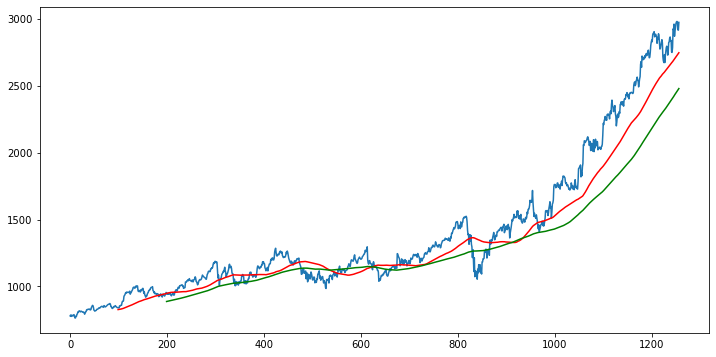

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(1257, 14)

In [ ]:
data_training = pd.DataFrame(df['close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(879, 1)
(378, 1)


In [ ]:
data_training

,close
0,779.98
1,786.16
2,775.97
3,784.80
4,785.00
...,...
874,1403.59
875,1375.18
876,1348.33
877,1356.86


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
from keras.models import Sequential
model = Sequential()
model.add(LSTM(units = 50, activation= 'relu', return_sequences= True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation= 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation= 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

NameError: name 'LSTM' is not defined

In [ ]:
x_train.shape

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.shape

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [ ]:
final_df.head()

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data.shape

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

In [ ]:
y_predicted = model.predict(x_test)
y_predicted.shape

In [ ]:
scaler.scale_

In [ ]:
scale_factor = 1/0.0025047
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()